In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib.pyplot import figure
import json

In [2]:
# Read the News sentiment csv file into a pandas DataFrame
news_df = pd.read_csv('../resources/news/daily_sentiment_business_news.csv')
news_df.head()

,Unnamed: 0,times,sentiment_score,magnitude_score
0,0,2019-01-01,-0.062500,0.525000
1,1,2019-01-02,-0.030769,0.315385
2,2,2019-01-03,0.058333,0.408333
3,3,2019-01-04,0.066667,0.420000
4,4,2019-01-05,0.114286,0.314286


In [3]:
# Create a new dataframe with only the columns needed for the Regression
clean_news_df = news_df.drop(['Unnamed: 0','magnitude_score'], axis=1).set_index('times')
clean_news_df.index.names = ['date']
clean_news_df.index = pd.to_datetime(clean_news_df.index)
clean_news_df.head()

,sentiment_score
date,
2019-01-01,-0.062500
2019-01-02,-0.030769
2019-01-03,0.058333
2019-01-04,0.066667
2019-01-05,0.114286


In [4]:
# Read the VIX history csv file into a pandas DataFrame
vix_df = pd.read_csv('../resources/vix/vix_history.csv')
vix_df.head()

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,1/2/2004,17.96,18.68,17.54,18.22
1,1/5/2004,18.45,18.49,17.44,17.49
2,1/6/2004,17.66,17.67,16.19,16.73
3,1/7/2004,16.72,16.75,15.50,15.50
4,1/8/2004,15.42,15.68,15.32,15.61


In [5]:
# Create a new dataframe with only the columns needed for the Regression
clean_vix_df = vix_df.drop(['VIX Open','VIX High','VIX Low'], axis=1).set_index('Date')
clean_vix_df.index.names = ['date']
clean_vix_df.rename(columns={'VIX Close': 'vix_close'}, inplace=True)
clean_vix_df.index = pd.to_datetime(clean_vix_df.index, format="%m/%d/%Y")
clean_vix_df.head()

,vix_close
date,
2004-01-02,18.22
2004-01-05,17.49
2004-01-06,16.73
2004-01-07,15.50
2004-01-08,15.61


In [6]:
# Merge the News Sentiment and VIX data
merged_df=pd.merge(clean_news_df,clean_vix_df, how='outer', left_index=True, right_index=True)
merged_df.tail()

,sentiment_score,vix_close
date,,
2019-04-12,NaN,12.01
2019-04-15,NaN,12.32
2019-04-16,NaN,12.18
2019-04-17,NaN,12.60
2019-04-18,NaN,12.09


In [7]:
# Drop rows with NaNs
merged_df.dropna(inplace=True)
merged_df.head()

,sentiment_score,vix_close
date,,
2019-01-02,-0.030769,23.22
2019-01-03,0.058333,25.45
2019-01-04,0.066667,21.38
2019-01-07,0.193333,21.40
2019-01-08,0.117647,20.47


In [8]:
# Export the data
merged_df.to_csv("../resources/vix/vix_sentiment.csv", index=False)
merged_df.to_json("../resources/vix/vix_sentiment.json", orient="table")

In [23]:
# Assign the data to X and y
# Reshape to create this requires a two-dimensional array of values
X = merged_df["sentiment_score"].values.reshape(-1, 1)
y = merged_df["vix_close"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (41, 1) (41, 1)


Text(0, 0.5, 'VIX Closing Value (Source: CBOE)')

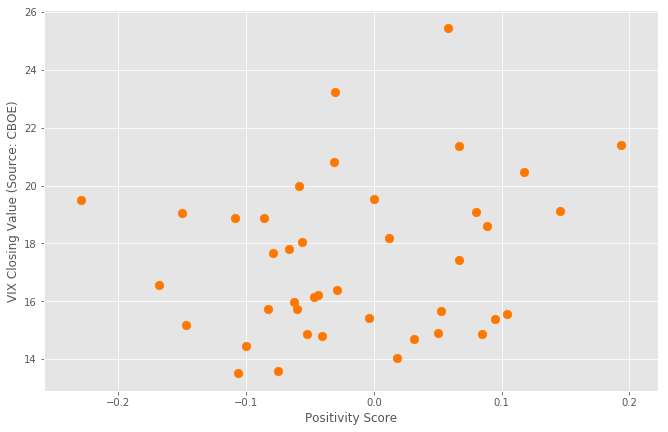

In [24]:
# Plot the data to see if a linear trend exists
plt.style.use('ggplot')
figure(num=None, figsize=(11, 7))
plt.scatter(X, y,color='#FF7700',marker='o',s=75)
plt.xlabel("Positivity Score")
plt.ylabel("VIX Closing Value (Source: CBOE)")

In [25]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
print(X_train)

[[ 5.21739135e-02]
 [ 1.17647061e-01]
 [-1.50000006e-01]
 [-1.47058823e-01]
 [-5.83333336e-02]
 [ 1.45454548e-01]
 [ 9.47368439e-02]
 [ 1.04545457e-01]
 [-1.75307779e-09]
 [ 8.84615389e-02]
 [ 1.19999984e-02]
 [-4.37500007e-02]
 [-3.70370266e-03]
 [-7.91666688e-02]
 [-6.66666681e-02]
 [-6.25000000e-02]
 [-9.99999978e-02]
 [ 1.81818174e-02]
 [ 5.00000005e-02]
 [ 3.10344817e-02]
 [ 6.66666652e-02]
 [-8.57142870e-02]
 [-3.15789467e-02]
 [-1.06060607e-01]
 [-3.07692301e-02]
 [-7.49999979e-02]
 [-1.67857143e-01]
 [ 5.83333373e-02]
 [-2.29411762e-01]
 [ 1.93333335e-01]]


In [27]:
print(y_train)

[[15.65]
 [20.47]
 [19.04]
 [15.17]
 [19.98]
 [19.13]
 [15.38]
 [15.57]
 [19.52]
 [18.6 ]
 [18.19]
 [16.22]
 [15.43]
 [17.66]
 [17.8 ]
 [15.97]
 [14.46]
 [14.02]
 [14.91]
 [14.7 ]
 [17.42]
 [18.87]
 [20.8 ]
 [13.51]
 [23.22]
 [13.57]
 [16.57]
 [25.45]
 [19.5 ]
 [21.4 ]]


In [28]:
# Create the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [29]:
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(mse)
print(r2)

4.35682221612686
-0.031044826623766175


In [31]:
# Call the `score` method on the model to show the r2 score
model.score(X_test, y_test)

-0.031044826623766175

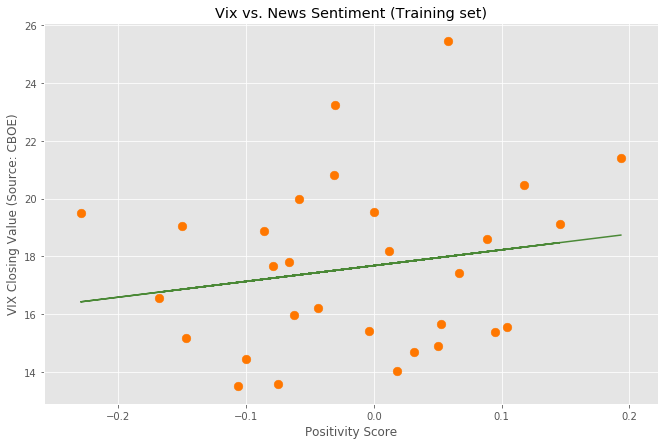

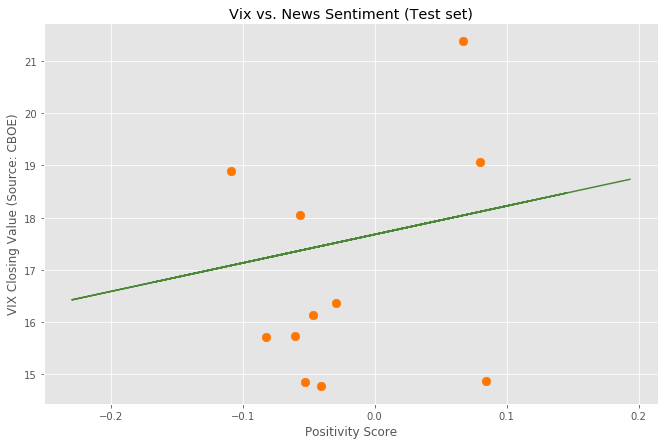

In [32]:
# Visualizing the Training set results
viz_train = plt
figure(num=None, figsize=(11, 7))
viz_train.scatter(X_train, y_train, color='#FF7700',marker='o',s=75)
viz_train.plot(X_train, model.predict(X_train), color='#4B8937')
viz_train.title('Vix vs. News Sentiment (Training set)')
viz_train.xlabel('Positivity Score')
viz_train.ylabel('VIX Closing Value (Source: CBOE)')
viz_train.show()

# Visualizing the Test set results
viz_test = plt
figure(num=None, figsize=(11, 7))
viz_test.scatter(X_test, y_test, color='#FF7700',marker='o',s=75)
viz_test.plot(X_train, model.predict(X_train), color='#4B8937')
viz_test.title('Vix vs. News Sentiment (Test set)')
viz_test.xlabel('Positivity Score')
viz_test.ylabel('VIX Closing Value (Source: CBOE)')
viz_test.show()

In [46]:
# Try to make on a new prediction
new_value = np.array([[.02]])
y_pred = model.predict(new_value)
print(y_pred)

[[17.78883779]]
